# Portfolio assignment 15: multivariate analysis on penguins dataset
Train a decision tree to predict the species of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

Optional: Perform the same tasks but try to predict the sex of the pinguin based on the other columns

In [1]:
import pandas as pd
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Filling missing values
In this dataframe there are some values missing. So first we will fill the blanks with the mean value of each column.

In [2]:
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(value=penguins['bill_length_mm'].mean())
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(value=penguins['bill_depth_mm'].mean())
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(value=penguins['flipper_length_mm'].mean())
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(value=penguins['body_mass_g'].mean())
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


For sex, we can not take the mean value, so we will take the most popular value.

In [3]:
penguins['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

The male sex is the most popular.

In [4]:
penguins['sex'] = penguins['sex'].fillna(value='Male')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


## Training the model

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
features = ['bill_length_mm']
dt = DecisionTreeClassifier(max_depth = 1)
dt.fit(penguins[features], penguins['species'])

DecisionTreeClassifier(max_depth=1)

In [7]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

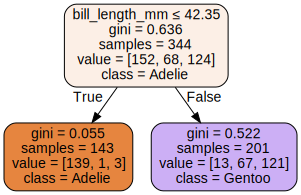

In [8]:
plot_tree_classification(dt, features, penguins.species.unique())

## Evaluating the model

In [9]:
predictions = dt.predict(penguins[features])

In [10]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [11]:
calculate_accuracy(predictions, penguins.species)

0.7558139534883721

<b>Note:</b> Using accuracy is actually not the best way to evaluate a classification model. However, for this course it will serve as a easy-to-understand first measurement.

Evaluating our model on the same data that it was trained on, actually provides an overoptimistic estimate of our model's performance. Our intent is to use our model on data that it has not yet seen before, so we should evaluate our model in the same way. 

## Test/train split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['species'])
print(penguins_train.shape, penguins_test.shape)

(240, 7) (104, 7)


In [14]:
dt_classification = DecisionTreeClassifier(max_depth = 2)
dt_classification.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=2)

In [15]:
predictionsOnTrainset = dt_classification.predict(penguins_train[features])
predictionsOnTestset = dt_classification.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.8125
Accuracy on test set 0.7307692307692307


The accuracy on the training set is higher. This is expected, because the test data set is a different dataset than the one we trained our model on.

By a depth of 5 the accuracy on the test set is then at its highest, the accuracy is 0.7211538461538461. By a depth op 9 the accuracy of the training set is then at its peak, the accuracy is 0.8958333333333334.